<a href="https://colab.research.google.com/github/hsallrounder/Data_Mining_And_Predictive_Analysis-Workshop-2022/blob/main/hcluster(auto_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Data Mining And Predictive Analysis Workshop/auto.csv')
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [4]:
data.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
mpg             float64
dtype: object

In [5]:
for col in data:
  if data[col].dtypes=='float64':
    data[col] = data[col].astype(int)

In [6]:
data.dtypes

cylinders       int64
displacement    int64
horsepower      int64
weight          int64
acceleration    int64
model_year      int64
origin          int64
mpg             int64
dtype: object

In [7]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307,130,3504,12,70,1,18
1,8,350,165,3693,11,70,1,15
2,8,318,150,3436,11,70,1,18
3,8,304,150,3433,12,70,1,16
4,8,302,140,3449,10,70,1,17


In [8]:
from sklearn.preprocessing import normalize
data_scaled=normalize(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.000284,0.005113
1,0.002154,0.094240,0.044427,0.994364,0.002962,0.018848,0.000269,0.004039
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.000289,0.005210
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.000290,0.004637
4,0.002308,0.087137,0.040395,0.995153,0.002885,0.020197,0.000289,0.004905


In [9]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


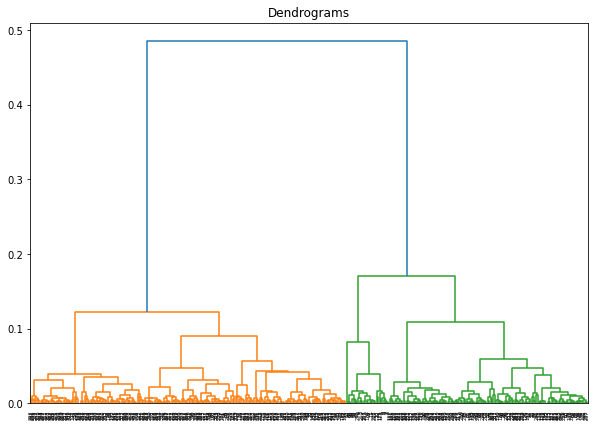

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

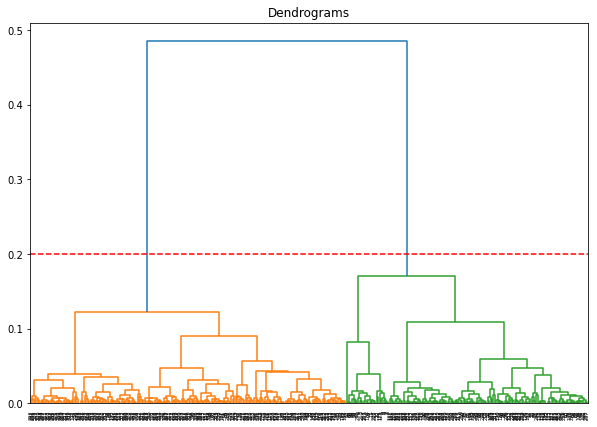

In [11]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=0.2,color='r',linestyle='--')

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

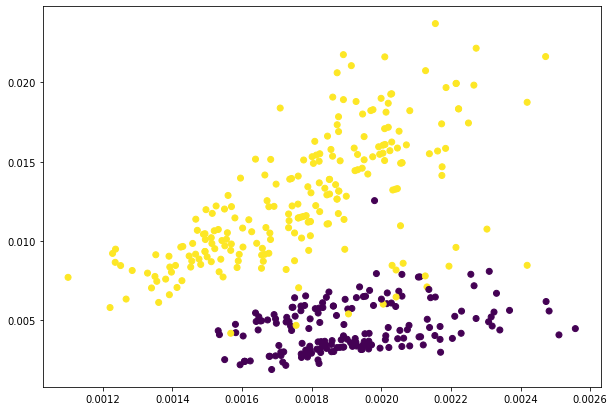

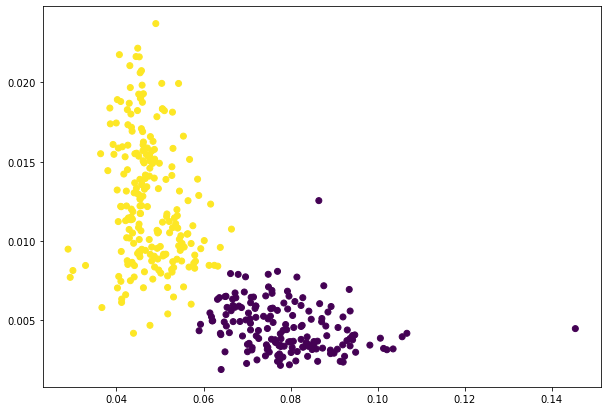

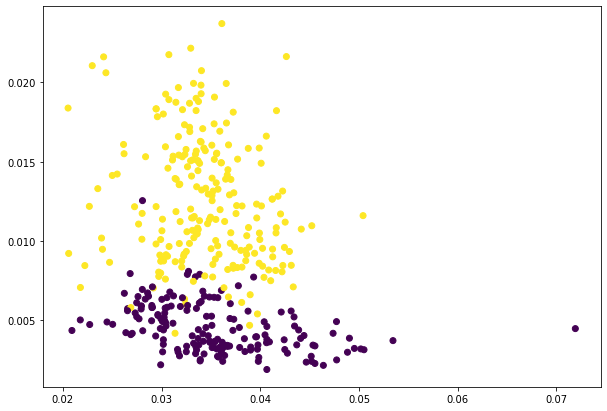

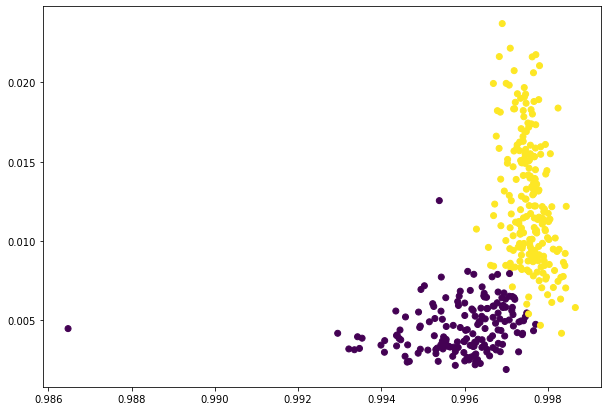

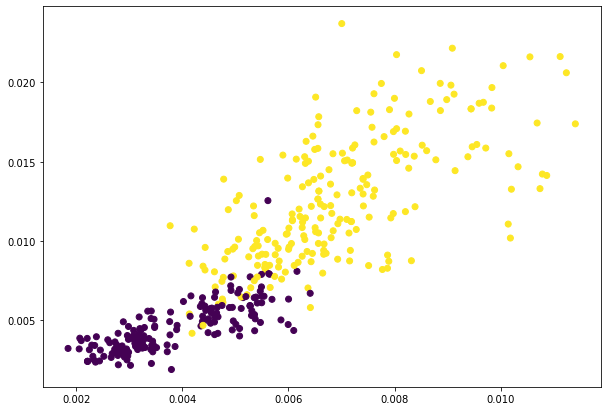

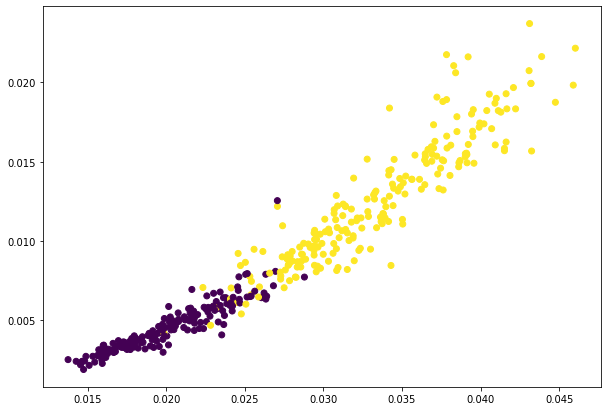

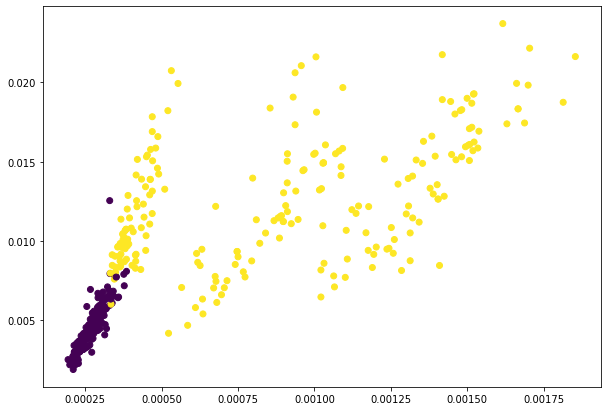

In [13]:
for col in data:
  if col!='mpg':
    plt.figure(figsize=(10,7))
    plt.scatter(data_scaled[col],data_scaled['mpg'],c=cluster.labels_)